<a href="https://colab.research.google.com/github/saeid-uot/3253-Machine-Learning/blob/main/Week%205%20Assignment%20%7C%20Logistic_Regression_for_Non_Linear_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective:
In this assignment, we explore the ability of linear model to learn and predict non-linear relationship between features and target.

First, we open a non-linear dataset called moon dataset.
Second, we train a linear regression model and evaluate its performance
Third, we add a few polynomial features to it
Forth, we retrain the model and observe the difference
Last, you go back to the assignment and answer the questions.

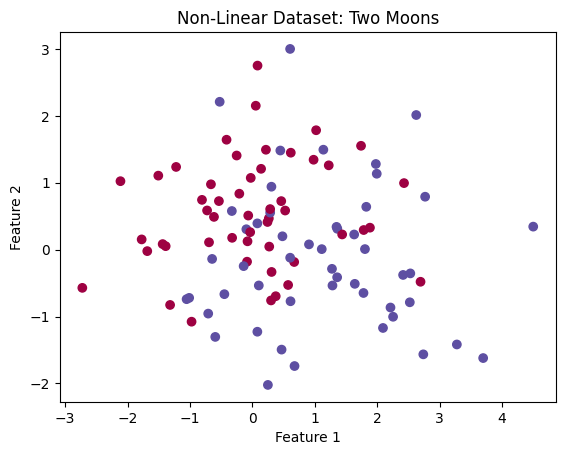

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate the non-linear dataset
X, y = make_moons(n_samples=100, noise=0.9, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Non-Linear Dataset: Two Moons")
plt.show()



# Lets train a linear model.

In [2]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear model (Logistic Regression)
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the linear model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Linear Model: {accuracy:.2f}")


Accuracy of the Linear Model: 0.60


#Lets Plot

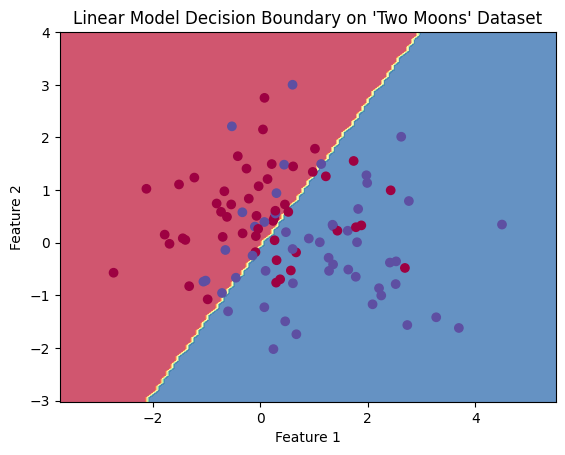

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the class labels for the grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear Model Decision Boundary on 'Two Moons' Dataset")
plt.show()

# Plot Learning Curve

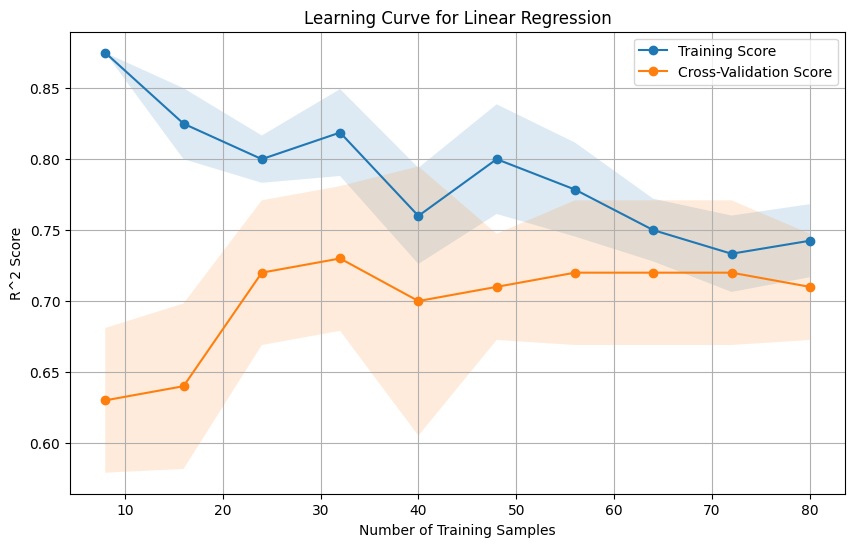

In [5]:
from sklearn.model_selection import learning_curve

# Define the learning curve function
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Learning Curve for Linear Regression')
plt.xlabel('Number of Training Samples')
plt.ylabel('R^2 Score')
plt.legend(loc='best')
plt.grid()
plt.show()


# Lets now add a few polynomial terms

In [16]:
#In this code, we create polynomial features using PolynomialFeatures with a degree of 3, which adds interaction terms between the features, allowing the model to capture non-linear relationships. Then, we train a non-linear model, an SVM with a polynomial kernel (kernel='poly') and degree 3. The resulting accuracy should be significantly better than that of the linear model on this non-linear dataset.

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

from sklearn.pipeline import make_pipeline
model = make_pipeline(PolynomialFeatures(degree=6), LogisticRegression())

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the non-linear model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Non-Linear Model: {accuracy:.2f}")

Accuracy of the Non-Linear Model: 0.55


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


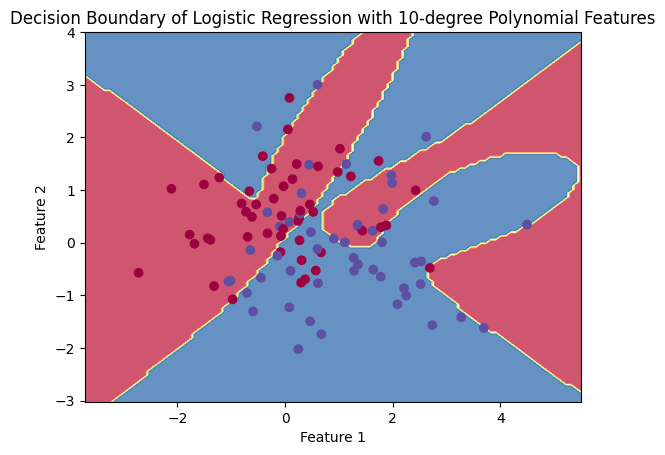

In [17]:
# Define a mesh grid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the class labels for the grid points using polynomial features
Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary of Logistic Regression with 10-degree Polynomial Features")
plt.show()


#Lets Plot the learning curve

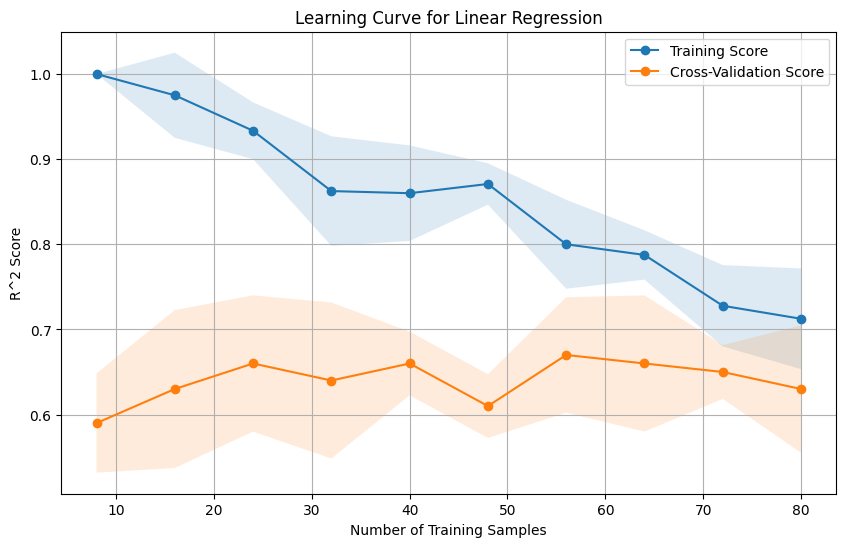

In [20]:
from sklearn.model_selection import learning_curve

# Define the learning curve function
train_sizes, train_scores, test_scores = learning_curve(model, X_poly, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15)
plt.title('Learning Curve for Linear Regression')
plt.xlabel('Number of Training Samples')
plt.ylabel('R^2 Score')
plt.legend(loc='best')
plt.grid()
plt.show()
